#**A reference on data processing from Integrated Automation Systems (IAS)**

- Ismael Ferreira
- Daniel Morais Cardozo
- Angelo Foletto


## **Knowing our Dataset**   
   
The intention was to find dates related to the movement of boats obtained by the AIS system, available on all medium and large cargo vessels and all passenger's vessels.

The dates found have two behaviors, the first type looks like a photo, ships and their positions at sea at a specific time. Another type is a clear trajectory, positions as a function of time, this second is much less to find and is usually available on paid sites. Like VTExplotere and MarineTraffic.com (where the date of the work “Open Data for Anomaly Detection in Maritime Surveillance” was taken from) A reliable source, of the first type, which pulls its data from US Coast Guard data has been found on the MarineCadastre.gov website, this website contains records from 2009 to 2020. The date in the question of this work was taken from this website, the year 2021, January 1st, identified by AIS_2020_01_01.   
     
      
#### **Description:**   
   
    MMSI - Maritime Mobile Service Identity - Unique identifier number of stations related to vessels.
    BaseDateTime - Date and time of transmission
    LAT - Latitude
    LON - Longitude
    SOG - SpeedOver Ground
    COG - course over ground
    Heading - Heading/direction
    VesselName - Name of vessels
    IMO - ship identification number internationally
    CallSign - Vessel's call sign
    VesselType - Type of vessels
    Status -
    Length - Length
    Width - Width
    Draft - Depth at which the vessel is at water level.
    Cargo - Weight that the vessel carries
    TranscieverClass - AIS transmitter class (can be A or B)

## 2 Data exploration and cleaning
We remove incorrectly entered values (non-compliant); We excluded all lines that did not contain TransieverClass, then CallSing (as they are unique) - 38K; we removed all lines that contained (Lenght) empty length, as it is a reference value - 35k; Objective, considerably reduced outliers.

### 2.1 Import libraries
Necessary libraries viz. numpy, pandas, matplotlib and seaborn are imported.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

def copyDatabase(df):
  return df.copy(deep=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2.2 Load data
Download the data.csv file of Vessel Traffic Data from https://marinecadastre.gov/ais/


In [ ]:
database = pd.read_csv('/content/drive/Shareddrives/CD - Embarcações/35k_2020_01_01_tratado.csv', sep=',', na_filter=True)
database.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,367149340,2020-01-01T00:00:00,29.96476,-90.02724,1.3,10.0,16.0,SYDNEE TAYLOR,NaN,WDD4807,31.0,0.0,26,9.0,NaN,31.0,B
1,367687520,2020-01-01T00:00:00,30.20558,-91.03578,10.7,124.9,130.0,CHIPPEWA,NaN,WDI3361,31.0,0.0,22,NaN,NaN,NaN,B
2,367368170,2020-01-01T00:00:03,47.53785,-122.32833,0.6,46.5,141.0,SONJA H,NaN,WDE5536,31.0,0.0,18,6.0,NaN,32.0,B
3,367007980,2020-01-01T00:00:05,37.95154,-121.32682,0.0,-49.6,511.0,ANGIE M BRUSCO,IMO5111359,WDC3446,31.0,0.0,28,7.0,3.4,NaN,B
4,367538940,2020-01-01T00:00:05,30.00258,-93.22608,3.1,168.0,511.0,RITA ANN,NaN,WDG4670,31.0,0.0,21,NaN,NaN,NaN,B


Read this file via pandas read_cvs command.Print the first 5 rows of resultant DataFrame. Each row of data in output represents a record for U.S coastal water for calendar year 2020

In [ ]:
data = copyDatabase(database)
data.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,367149340,2020-01-01T00:00:00,29.96476,-90.02724,1.3,10.0,16.0,SYDNEE TAYLOR,NaN,WDD4807,31.0,0.0,26,9.0,NaN,31.0,B
1,367687520,2020-01-01T00:00:00,30.20558,-91.03578,10.7,124.9,130.0,CHIPPEWA,NaN,WDI3361,31.0,0.0,22,NaN,NaN,NaN,B
2,367368170,2020-01-01T00:00:03,47.53785,-122.32833,0.6,46.5,141.0,SONJA H,NaN,WDE5536,31.0,0.0,18,6.0,NaN,32.0,B
3,367007980,2020-01-01T00:00:05,37.95154,-121.32682,0.0,-49.6,511.0,ANGIE M BRUSCO,IMO5111359,WDC3446,31.0,0.0,28,7.0,3.4,NaN,B
4,367538940,2020-01-01T00:00:05,30.00258,-93.22608,3.1,168.0,511.0,RITA ANN,NaN,WDG4670,31.0,0.0,21,NaN,NaN,NaN,B


### 2.3. Count number of rows and columns
There are 34.999 rows and 17 columns which represent a 34.999 record for U.S coastal water with 17 data points.

In [ ]:
data.shape

(34999, 17)

### 2.4. Count of columns containing empty values
Datasets are not perfect and DatFrame from dataset might contain some missing values in any column or row which can mislead the interpretation.


In [ ]:
data.isna().sum()

MMSI                    0
BaseDateTime            0
LAT                     0
LON                     0
SOG                     0
COG                     0
Heading                 0
VesselName              6
IMO                 17746
CallSign                2
VesselType            169
Status               4944
Length                  0
Width                4674
Draft               24141
Cargo               22402
TranscieverClass        0
dtype: int64

### 2.5. Count number of class A and B vessels

In [ ]:
data['TranscieverClass'].value_counts()

B    30022
A     4977
Name: TranscieverClass, dtype: int64

So, the number of class A vessels that are 300 gross tonnage ships and more involved in international voyages 500 gross tonnage ships and more not involved in international voyages passenger ships, regardless of size is 4977 and those domestic commercial vessels and pleasure boats with class B is 30022.


### 2.6. Listing columns and their data type
This is done to check the type of data present in the dataset. In case of any categorical data, the data is changed in dummy numeric. This is done because categorical data will mislead the interpretation of data.


In [ ]:
data.dtypes

MMSI                  int64
BaseDateTime         object
LAT                 float64
LON                 float64
SOG                 float64
COG                 float64
Heading             float64
VesselName           object
IMO                  object
CallSign             object
VesselType          float64
Status              float64
Length                int64
Width               float64
Draft               float64
Cargo               float64
TranscieverClass     object
dtype: object

### 2.7. Encoding categorical data
To make sure that the learning algorithm interprets type A and type B vessels correctly, categorical string values are converted to integers. The categorical data present in the column 'TranscieverClass' are encoded/transformed from A and B to 1 and 0 using LabelEncoder from sklearn.preprocessing.


In [ ]:
data

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,367149340,2020-01-01T00:00:00,29.96476,-90.02724,1.3,10.0,16.0,SYDNEE TAYLOR,NaN,WDD4807,31.0,0.0,26,9.0,NaN,31.0,B
1,367687520,2020-01-01T00:00:00,30.20558,-91.03578,10.7,124.9,130.0,CHIPPEWA,NaN,WDI3361,31.0,0.0,22,NaN,NaN,NaN,B
2,367368170,2020-01-01T00:00:03,47.53785,-122.32833,0.6,46.5,141.0,SONJA H,NaN,WDE5536,31.0,0.0,18,6.0,NaN,32.0,B
3,367007980,2020-01-01T00:00:05,37.95154,-121.32682,0.0,-49.6,511.0,ANGIE M BRUSCO,IMO5111359,WDC3446,31.0,0.0,28,7.0,3.4,NaN,B
4,367538940,2020-01-01T00:00:05,30.00258,-93.22608,3.1,168.0,511.0,RITA ANN,NaN,WDG4670,31.0,0.0,21,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,367059310,2020-01-01T00:06:12,29.93100,-92.65333,0.0,95.9,511.0,EMS EXPRESS,NaN,WDC6662,31.0,0.0,22,10.0,NaN,57.0,B
34995,367472380,2020-01-01T00:06:13,26.44887,-80.06500,5.7,1.3,511.0,LADY DELRAY,IMO0000000,WDF6262,60.0,NaN,34,20.0,NaN,NaN,B
34996,368019260,2020-01-01T00:06:38,29.54822,-95.02474,0.0,106.9,511.0,LAST TRADE,IMO0000000,WDJ8730,37.0,NaN,0,0.0,NaN,NaN,B
34997,367596760,2020-01-01T00:06:57,40.64751,-74.11220,5.8,-148.0,253.0,CAPTAIN D,IMO8424587,WDH2354,31.0,0.0,27,7.0,3.0,NaN,B


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

def transformer_base(df, features_numerics, features_categorical):
    transformer_numeric = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    transformer_categorical = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder())])

    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', transformer_numeric, features_numerics),
            ('category', transformer_categorical, features_categorical),
        ])

    data_t = preprocessor.fit_transform(df)

    return data_t

copy_aux = data.copy(deep=True)

del copy_aux['MMSI']
del copy_aux['BaseDateTime']
del copy_aux['VesselName']
del copy_aux['IMO']
del copy_aux['CallSign']
del copy_aux['Status']
del copy_aux['VesselType']
del copy_aux['Cargo']

features_numerics = ['LAT','LON','SOG','COG','Heading','Length','Width','Draft']
features_categorical = ['TranscieverClass']

dataframe_transformer = pd.DataFrame(data=transformer_base(copy_aux, features_numerics, features_categorical), columns=)
dataframe_transformer

,0,1,2,3,4,5,6,7,8,9
0,-0.632075,0.278603,-0.220317,0.257138,-1.889961,-0.383235,-0.314517,0.000000,0.0,1.0
1,-0.602327,0.228727,1.884316,1.168488,-1.256352,-0.442754,0.000000,0.000000,0.0,1.0
2,1.538688,-1.318815,-0.377045,0.546644,-1.195214,-0.502273,-0.659992,0.000000,0.0,1.0
3,0.354513,-1.269286,-0.511384,-0.215590,0.861236,-0.353476,-0.544834,-1.210440,0.0,1.0
4,-0.627403,0.120407,0.182698,1.510343,0.861236,-0.457634,0.000000,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
34994,-0.636245,0.148732,-0.511384,0.938469,0.861236,-0.442754,-0.199359,0.000000,0.0,1.0
34995,-1.066384,0.771275,0.764830,0.188132,0.861236,-0.264197,0.952222,0.000000,0.0,1.0
34996,-0.683529,0.031457,-0.511384,1.025718,0.861236,-0.770109,-1.350941,0.000000,0.0,1.0
34997,0.687540,1.065665,0.787220,-0.996068,-0.572721,-0.368355,-0.544834,-1.374554,0.0,1.0


### 2.8 _NaN_ data filling
In this session, the null or empty data present in the _dataset_.

In [ ]:
# Copying the dataset to ensure root integrity
data_swap = pd.DataFrame(copyDatabase(database))

#### 2.8.1 Status
This block fills the _NaN_ cells present in the Status column through the Mode of their values.

In [ ]:
index = np.isnan(data_swap['Status'])
data_swap.at[index[index == True].index, 'Status'] = int(data_swap.Status.mode())
data_swap

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,367149340,2020-01-01T00:00:00,29.96476,-90.02724,1.3,10.0,16.0,SYDNEE TAYLOR,NaN,WDD4807,31.0,0.0,26,9.0,NaN,31.0,B
1,367687520,2020-01-01T00:00:00,30.20558,-91.03578,10.7,124.9,130.0,CHIPPEWA,NaN,WDI3361,31.0,0.0,22,NaN,NaN,NaN,B
2,367368170,2020-01-01T00:00:03,47.53785,-122.32833,0.6,46.5,141.0,SONJA H,NaN,WDE5536,31.0,0.0,18,6.0,NaN,32.0,B
3,367007980,2020-01-01T00:00:05,37.95154,-121.32682,0.0,-49.6,511.0,ANGIE M BRUSCO,IMO5111359,WDC3446,31.0,0.0,28,7.0,3.4,NaN,B
4,367538940,2020-01-01T00:00:05,30.00258,-93.22608,3.1,168.0,511.0,RITA ANN,NaN,WDG4670,31.0,0.0,21,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,367059310,2020-01-01T00:06:12,29.93100,-92.65333,0.0,95.9,511.0,EMS EXPRESS,NaN,WDC6662,31.0,0.0,22,10.0,NaN,57.0,B
34995,367472380,2020-01-01T00:06:13,26.44887,-80.06500,5.7,1.3,511.0,LADY DELRAY,IMO0000000,WDF6262,60.0,0.0,34,20.0,NaN,NaN,B
34996,368019260,2020-01-01T00:06:38,29.54822,-95.02474,0.0,106.9,511.0,LAST TRADE,IMO0000000,WDJ8730,37.0,0.0,0,0.0,NaN,NaN,B
34997,367596760,2020-01-01T00:06:57,40.64751,-74.11220,5.8,-148.0,253.0,CAPTAIN D,IMO8424587,WDH2354,31.0,0.0,27,7.0,3.0,NaN,B


#### 2.8.2 Length
Through the length of the vessels, it is possible to estimate the width of the vessels that have this value as null in the _dataset_.

In [ ]:
def dataLength (df):
  """
  Selected only the desired values in the Length column, scrolling through it and grouping it.
  In order to select an element of each value.
  """
  df.groupby(["Length"]).agg(["count"])
  data_lenght = df.groupby(["Length"]).size().reset_index(name='counts')
  return np.sort(np.unique(data_lenght.Length[:-1].astype(np.int)))

for i in dataLength(data_swap):
  """
  Select only column elements that have its value as NaN
  """
  swap = data[data['Length'] == i].Width
  index = np.isnan(data_swap.loc[data_swap[data_swap['Length'] == i].index, 'Width'])
  data_swap.at[index[index == True].index, 'Width'] = np.ceil(swap.mean())

data_swap

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,367149340,2020-01-01T00:00:00,29.96476,-90.02724,1.3,10.0,16.0,SYDNEE TAYLOR,NaN,WDD4807,31.0,0.0,26,9.0,NaN,31.0,B
1,367687520,2020-01-01T00:00:00,30.20558,-91.03578,10.7,124.9,130.0,CHIPPEWA,NaN,WDI3361,31.0,0.0,22,8.0,NaN,NaN,B
2,367368170,2020-01-01T00:00:03,47.53785,-122.32833,0.6,46.5,141.0,SONJA H,NaN,WDE5536,31.0,0.0,18,6.0,NaN,32.0,B
3,367007980,2020-01-01T00:00:05,37.95154,-121.32682,0.0,-49.6,511.0,ANGIE M BRUSCO,IMO5111359,WDC3446,31.0,0.0,28,7.0,3.4,NaN,B
4,367538940,2020-01-01T00:00:05,30.00258,-93.22608,3.1,168.0,511.0,RITA ANN,NaN,WDG4670,31.0,0.0,21,8.0,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,367059310,2020-01-01T00:06:12,29.93100,-92.65333,0.0,95.9,511.0,EMS EXPRESS,NaN,WDC6662,31.0,0.0,22,10.0,NaN,57.0,B
34995,367472380,2020-01-01T00:06:13,26.44887,-80.06500,5.7,1.3,511.0,LADY DELRAY,IMO0000000,WDF6262,60.0,0.0,34,20.0,NaN,NaN,B
34996,368019260,2020-01-01T00:06:38,29.54822,-95.02474,0.0,106.9,511.0,LAST TRADE,IMO0000000,WDJ8730,37.0,0.0,0,0.0,NaN,NaN,B
34997,367596760,2020-01-01T00:06:57,40.64751,-74.11220,5.8,-148.0,253.0,CAPTAIN D,IMO8424587,WDH2354,31.0,0.0,27,7.0,3.0,NaN,B


#### 2.8.3 Cargo
Weight that the vessel carries, as we can see, it has 17856 registers with NaN values, it is possible to fill the NaN values making a calculation with length, draft, width and type.

In [ ]:
copy_aux = copyDatabase(data)
cargo = copy_aux[copy_aux['Cargo'].isna()]
cargo.shape

(22402, 17)

### 2. 9 Number of appearances of each MMSI number - Unique identifier

In [ ]:
database.groupby(["MMSI"]).agg(["count"])
size = database.groupby(["MMSI"]).size().reset_index(name='counts')
size[size["counts"] >= 1]

,MMSI,counts
0,4910,1
1,507027,9
2,1056261,7
3,1193046,4
4,12345678,6
...,...,...
7483,720899000,4
7484,740300000,2
7485,884996350,1
7486,896876500,6


## 3 Data visualization

Data visualization is the discipline to understand data by placing it into visual form in order to interactively and efficiently convey insights so that the patterns, trends and correlations of the data that might not otherwise be detected can be visualized in large data sets. It removes the noise from the data and highlights the useful information. As visualization makes it easier to detect patterns, trends and outliers, and provides clear, better and reliable result, it is implemented in this paper by creating count plot, pair plot and heat map. In this work, data visualization is done with the help of seaborn library

### 3.1 Count Plot
The graph will represent the distribution of classes of type A and type B vessels.
Visualization of the count graph of the data below in python is done using the graph of count of born at sea function.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


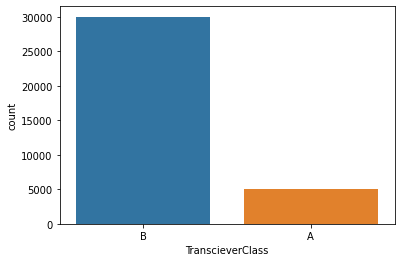

In [ ]:
sns.countplot(data['TranscieverClass'], label="Count")

### 3.2. Correlation of columns


Text(0.5, 1.0, 'Correlation of Columns')

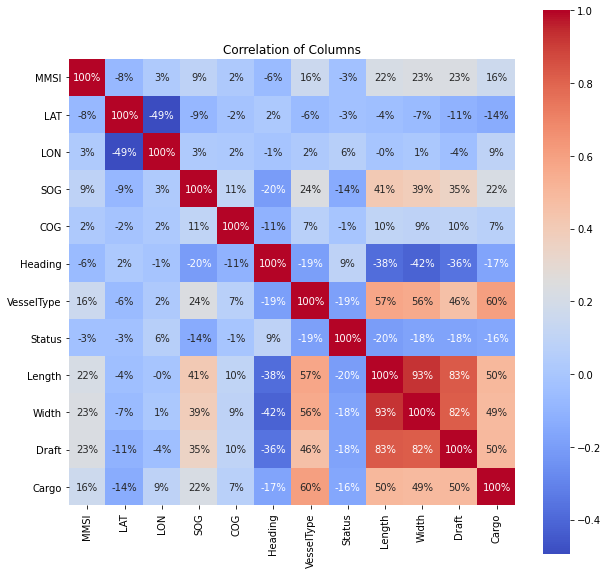

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

database.corr().head()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, square=True, cmap='coolwarm', fmt ='.0%')
plt.title('Correlation of Columns')

From the correlation graph it is easy to see the logic, that length and width are closely related, 0.93 correlation or 93% as it appears in the correlation graph

## 4 Oversampling
In this step we will increase the number of elements of the less represented class, which in this case is class A.

In [ ]:
dataframe_transformer[9].value_counts()

1.0    30022
0.0     4977
Name: 9, dtype: int64

First let's separate the tuples from our dataset where the class is equal to 0:

In [ ]:
classe_0 = dataframe_transformer[dataframe_transformer[9] == 0]
classe_0

,0,1,2,3,4,5,6,7,8,9
21,0.886708,1.223600,1.593250,-0.442436,-0.028040,-0.427874,-0.429676,0.000000,1.0,0.0
29,-0.575117,0.220828,-0.511384,0.213514,-1.928867,-0.398115,0.000000,0.000000,1.0,0.0
36,1.550098,-1.319003,-0.511384,0.539506,-1.762128,-0.279077,-0.659992,0.000000,1.0,0.0
39,-0.642702,0.282555,-0.511384,1.228769,-1.306374,1.997525,1.758329,1.907720,1.0,0.0
40,0.330810,-1.319743,-0.511384,0.518883,-1.128518,1.759449,1.643171,1.538464,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
34965,-1.029293,0.772058,-0.511384,1.284290,-0.483793,0.018518,-0.199359,-0.677071,1.0,0.0
34971,1.543199,-1.319560,-0.444214,0.196064,-0.967337,-0.293957,-0.084201,-0.595014,1.0,0.0
34983,-0.665937,0.281230,-0.511384,-0.731943,-0.194779,1.952886,2.334119,2.482118,1.0,0.0
34991,-0.363967,0.717985,-0.488994,1.294602,-1.011801,4.199728,3.831175,3.220629,1.0,0.0


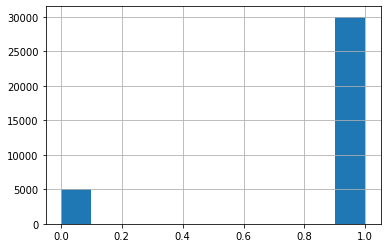

In [ ]:
dataframe_transformer[9].hist()

In [ ]:
classe_0.shape

(4977, 10)

Now let's get a sample size 30022 so that the classes are evenly distributed.

In [ ]:
sample_0 = classe_0.sample(n=30022, replace=True)
sample_0

,0,1,2,3,4,5,6,7,8,9
14240,-0.164360,-1.113361,-0.511384,0.265069,-1.773244,-0.219558,-0.199359,-0.718099,1.0,0.0
25041,-0.631697,0.089216,-0.377045,0.480018,-0.506025,-0.427874,-0.429676,0.000000,1.0,0.0
7909,-0.626183,0.243841,0.563323,-0.865988,-0.428214,-0.383235,-0.314517,0.000000,1.0,0.0
24180,0.930104,1.083080,-0.511384,-0.977032,-1.945541,-0.323716,-0.199359,-0.964270,1.0,0.0
7526,1.659095,-1.334515,-0.511384,0.960678,-1.639852,-0.457634,-0.659992,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9903,-0.638446,0.273162,-0.511384,0.780629,-0.267032,1.952886,2.334119,2.071833,1.0,0.0
26906,-0.632127,0.266018,-0.488994,1.151831,-0.611627,1.893367,2.103803,1.702578,1.0,0.0
13081,-2.069528,1.519836,0.496154,1.507964,-1.039591,3.768216,2.909910,0.758924,1.0,0.0
23019,0.813970,0.377609,-0.287486,0.820287,-1.545367,-0.189798,0.030957,0.000000,1.0,0.0


Now let's concatenate our sample data with the data from the original set that had a class equal to 1:

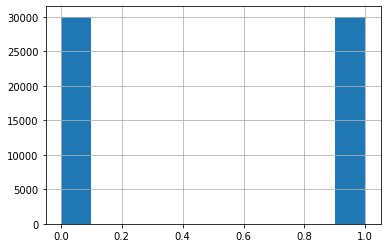

In [ ]:
classe_1 = dataframe_transformer[dataframe_transformer[9] == 1]
data_upsampled = pd.concat([sample_0, classe_1])
data_upsampled[9].hist()

Creating our classifier

In [ ]:
class Some_classifier:
  def __init__(self):
    self.predict_value = None
  def fit(self, X, y):
    self.predict_value = y.mode()
  def predict(self, X):
    return np.repeat(1, X.shape[0])

Separating into input variables (X) and target variables (y) and calculating standard accuracy:

In [ ]:
from sklearn.metrics import accuracy_score

X, y = dataframe_transformer.iloc[:, :-1], dataframe_transformer.iloc[:, -1]

my_classifier = Some_classifier()
my_classifier.fit(X, y)
y_pred = my_classifier.predict(X)

print("accuracy classifier: %.2f%%" % (accuracy_score(y, y_pred)*100))

accuracy classifier: 85.78%


## 5 Viewing geographic data

#### Documentation:

- A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(data, lat="LAT", lon="LON", hover_name="VesselName", hover_data=["MMSI", "TranscieverClass", "BaseDateTime", "SOG"],
                        color_discrete_sequence=["tomato"], zoom=3, height=700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## 6 Creating Test Sets

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = dados_upsampled.iloc[:, :-1], dados_upsampled.iloc[:, -1]

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)

sc = StandardScaler()

X_train = sc.fit_transform(x_treino)
X_test = sc.transform(x_teste)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def modelo (X_train, Y_train):

  #Regressão Logistica
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #KNeighbors
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #SVC
  svc_linear = SVC(kernel = 'linear', random_state = 0)
  svc_linear.fit(X_train, Y_train)

  #Gausian
  gaus = GaussianNB()
  gaus.fit(X_train, Y_train)

  #Arvore de Decisão
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  print('[0]Precisão do treino da Regressão Logistica: ', log.score(X_train, Y_train))
  print('[1]Precisão do treino do KNeighbors: ', knn.score(X_train, Y_train))
  print('[2]Precisão do treino da SVM: ', svc_linear.score(X_train, Y_train))
  print('[3]Precisão do treino do modelo Gauseano: ', gaus.score(X_train, Y_train))
  print('[4]Precisão do treino da Arvore de Decisão: ', tree.score(X_train, Y_train))

  return log, knn, svc_linear, gaus, tree

model = modelo(x_treino, y_treino)

[0]Precisão do treino da Regressão Logistica:  1.0
[1]Precisão do treino do KNeighbors:  0.9985010706638116
[2]Precisão do treino da SVM:  1.0
[3]Precisão do treino do modelo Gauseano:  1.0
[4]Precisão do treino da Arvore de Decisão:  1.0


In [ ]:
from sklearn.metrics import confusion_matrix

# nossa matriz de confusão
def matrix_confusion(y_test, x_pred):
  return confusion_matrix(y_test, x_pred)

def metrica_acuracia(resultado):
  #calculada através da razão (VN+VP)/(VP+FN+VN+FP)
  VN = resultado[0][0] #Verdadeiro Positivo
  VP = resultado[1][1] #Verdadeiro Negativo
  FN = resultado[1][0] #Falso Negativo
  FP = resultado[0][1] #Falso Positivo

  print('Acurácia = "{}"'.format(( VN + VP )/(VP + FN + VN + FP)))

#testando a acuracia modelo Regressão Logistica
metrica_acuracia(matrix_confusion(y_teste, model[0].predict(x_teste)))

Acurácia = "1.0"
